<a href="https://colab.research.google.com/github/joaocassella/MVP_ML/blob/main/ML_MVP_Notebook_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning - Notebook A
# Professores :
  * Tatiana Escovedo
  * Augusto Baffa
  * Luiz Schirmer

# Aluno : João Cassella

##Definição do Problema
O problema proposto é a classificação da vendabilidade de modelos de veículos, a partir de algumas características.

Foi utilizado o Car Evaluation Data Set hospedado em no site UCI, [Clique aqui](https://archive.ics.uci.edu/ml/datasets/car+evaluation) para acessar a página do dataset.

O dataset foi derivado de um modelo de decisão hierárquico simples originalmente desenvolvido para a demonstração de DEX, M. Bohanec, V. Rajkovic: Sistema especialista para tomada de decisão. Sistemica 1(1), pp. 145-157, 1990.).

##Informações sobre os atributos

O dataset contém 7 atributos descritos a seguir :

* buying - Classificação do preço de compra
* maint - Classificação do preço da manutenção
* doors - Quantidade de portas
* persons - Número máximo de ocupantes
* lug_boot - Classificação do tamanho do bagageiro
* safety - Classificação do nível de segurança
* target - Avaliação da vendabilidade


##Importação das bibliotecas



In [34]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.ensemble import ExtraTreesClassifier # ExtraTrees, para a Importância de Atributos
from sklearn.feature_selection import SelectKBest # para a Seleção Univariada
from sklearn.feature_selection import f_classif # para o teste ANOVA da Seleção Univariada
from sklearn.feature_selection import RFE # para a Eliminação Recursiva de Atributos
from sklearn.linear_model import LogisticRegression # Regressão Logística, para a Eliminação Recursiva de Atributos


from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # para a exibição das métricas do modelo
from sklearn.neighbors import KNeighborsClassifier # algoritmo KNN
from sklearn.tree import DecisionTreeClassifier # algoritmo Árvore de Classificação
from sklearn.naive_bayes import GaussianNB # algoritmo Naive Bayes
from sklearn.svm import SVC # algoritmo SVM
from sklearn.ensemble import GradientBoostingClassifier  # algoritmo Gradient Boosting Classifier



from sklearn.model_selection import GridSearchCV


## Dataset

### Carga

In [35]:
# Carrega arquivo csv usando Pandas usando uma URL

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/joaocassella/MVP_ML/main/car.data"

# Informa o cabeçalho das colunas
colunas = ['buying','maint','doors','persons','lug_boot','safety','target']

# Lê o arquivo utilizando as colunas informadas
ds_inicial = pd.read_csv(url, delimiter=',', names=colunas)

ds_inicial.head(200)


,buying,maint,doors,persons,lug_boot,safety,target
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
195,vhigh,high,5more,2,big,low,unacc
196,vhigh,high,5more,2,big,med,unacc
197,vhigh,high,5more,2,big,high,unacc
198,vhigh,high,5more,4,small,low,unacc


### Informações

In [36]:
# Mostra as dimensões do dataset
ds_inicial.shape

(1728, 7)

In [37]:
# Mostra as informações do
ds_inicial.describe()

,buying,maint,doors,persons,lug_boot,safety,target
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [38]:
# Exibir o domínio de todas as colunas
for coluna in ds_inicial.columns:
    dominio = ds_inicial[coluna].unique()
    print(f"Domínio da coluna '{coluna}': {dominio}")

Domínio da coluna 'buying': ['vhigh' 'high' 'med' 'low']
Domínio da coluna 'maint': ['vhigh' 'high' 'med' 'low']
Domínio da coluna 'doors': ['2' '3' '4' '5more']
Domínio da coluna 'persons': ['2' '4' 'more']
Domínio da coluna 'lug_boot': ['small' 'med' 'big']
Domínio da coluna 'safety': ['low' 'med' 'high']
Domínio da coluna 'target': ['unacc' 'acc' 'vgood' 'good']


###Preparação

In [39]:
# Vamos criar um novo dataset para armazenar os valores convertidos em numéricos

ds_final = ds_inicial.copy()

label_encoder = LabelEncoder()

for col in ds_inicial.columns:
    ds_final[col] = label_encoder.fit_transform(ds_inicial[col])

print(ds_final.head())

   buying  maint  doors  persons  lug_boot  safety  target
0       3      3      0        0         2       1       2
1       3      3      0        0         2       2       2
2       3      3      0        0         2       0       2
3       3      3      0        0         1       1       2
4       3      3      0        0         1       2       2


###Visualizações Unimodais

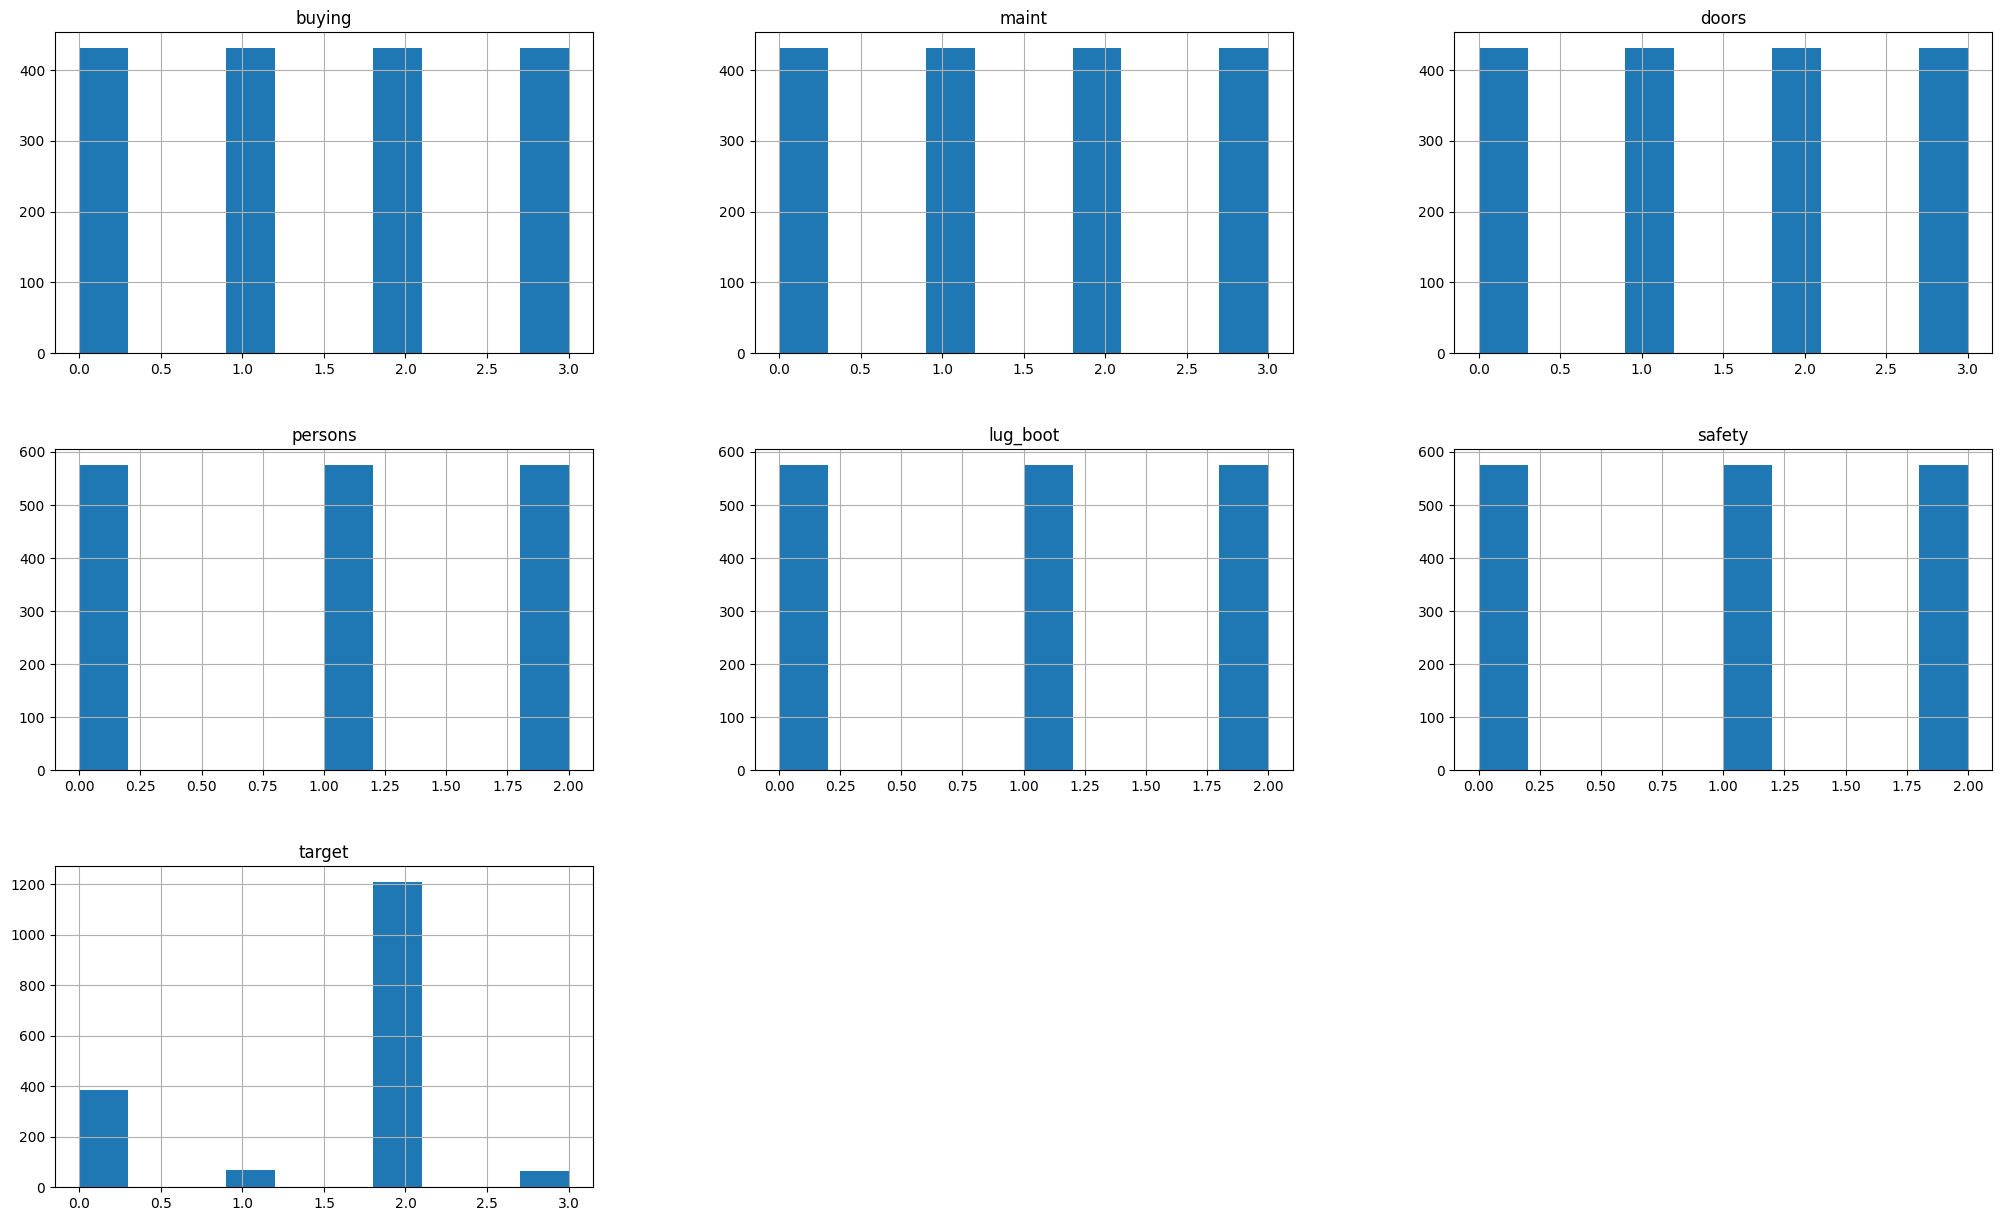

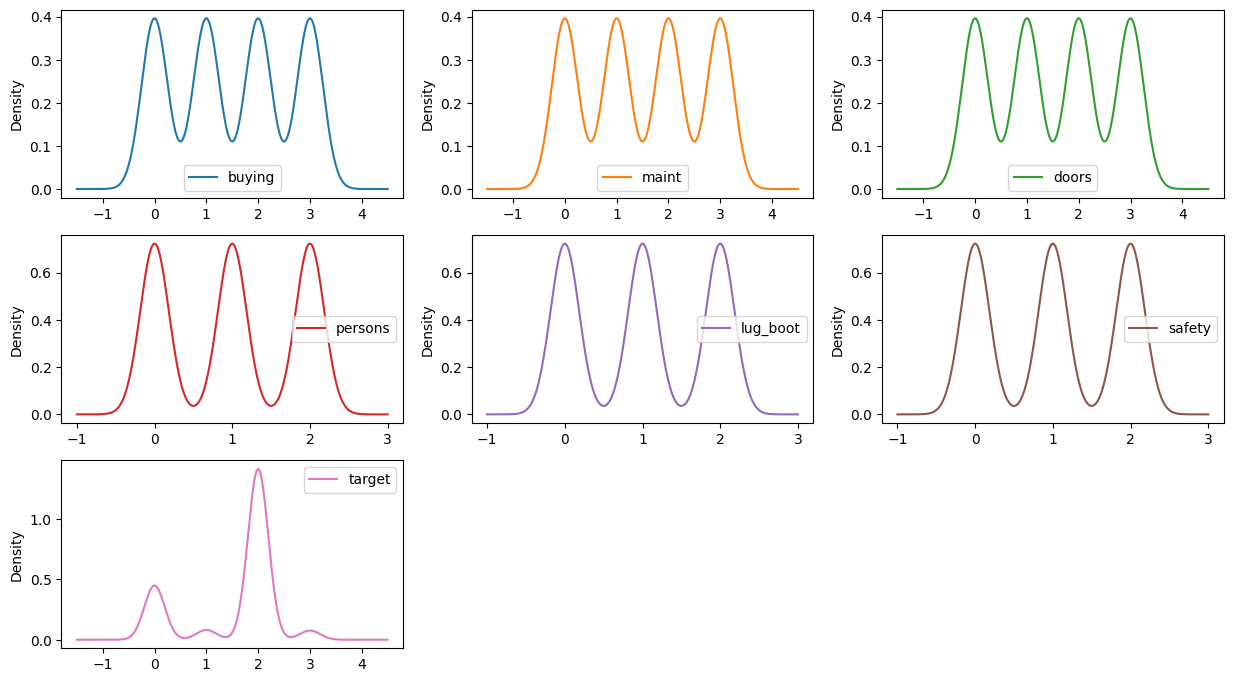

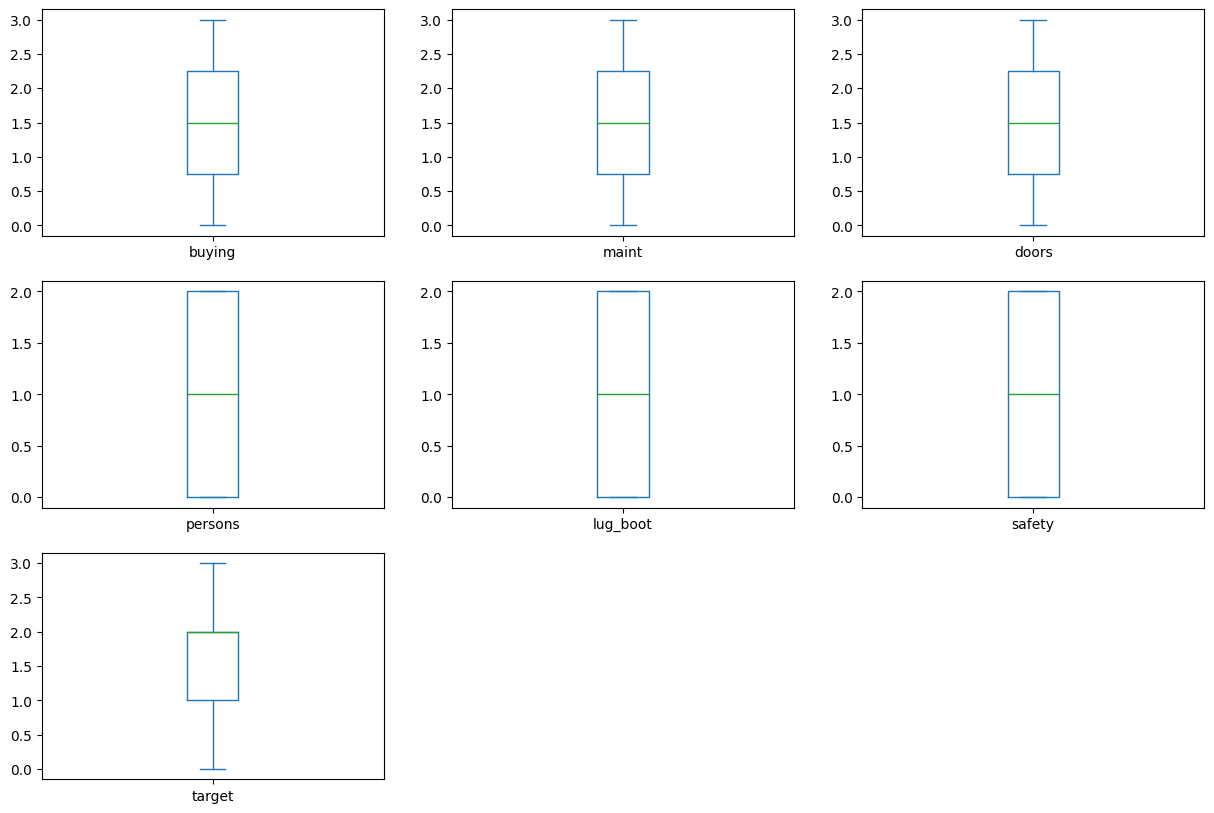

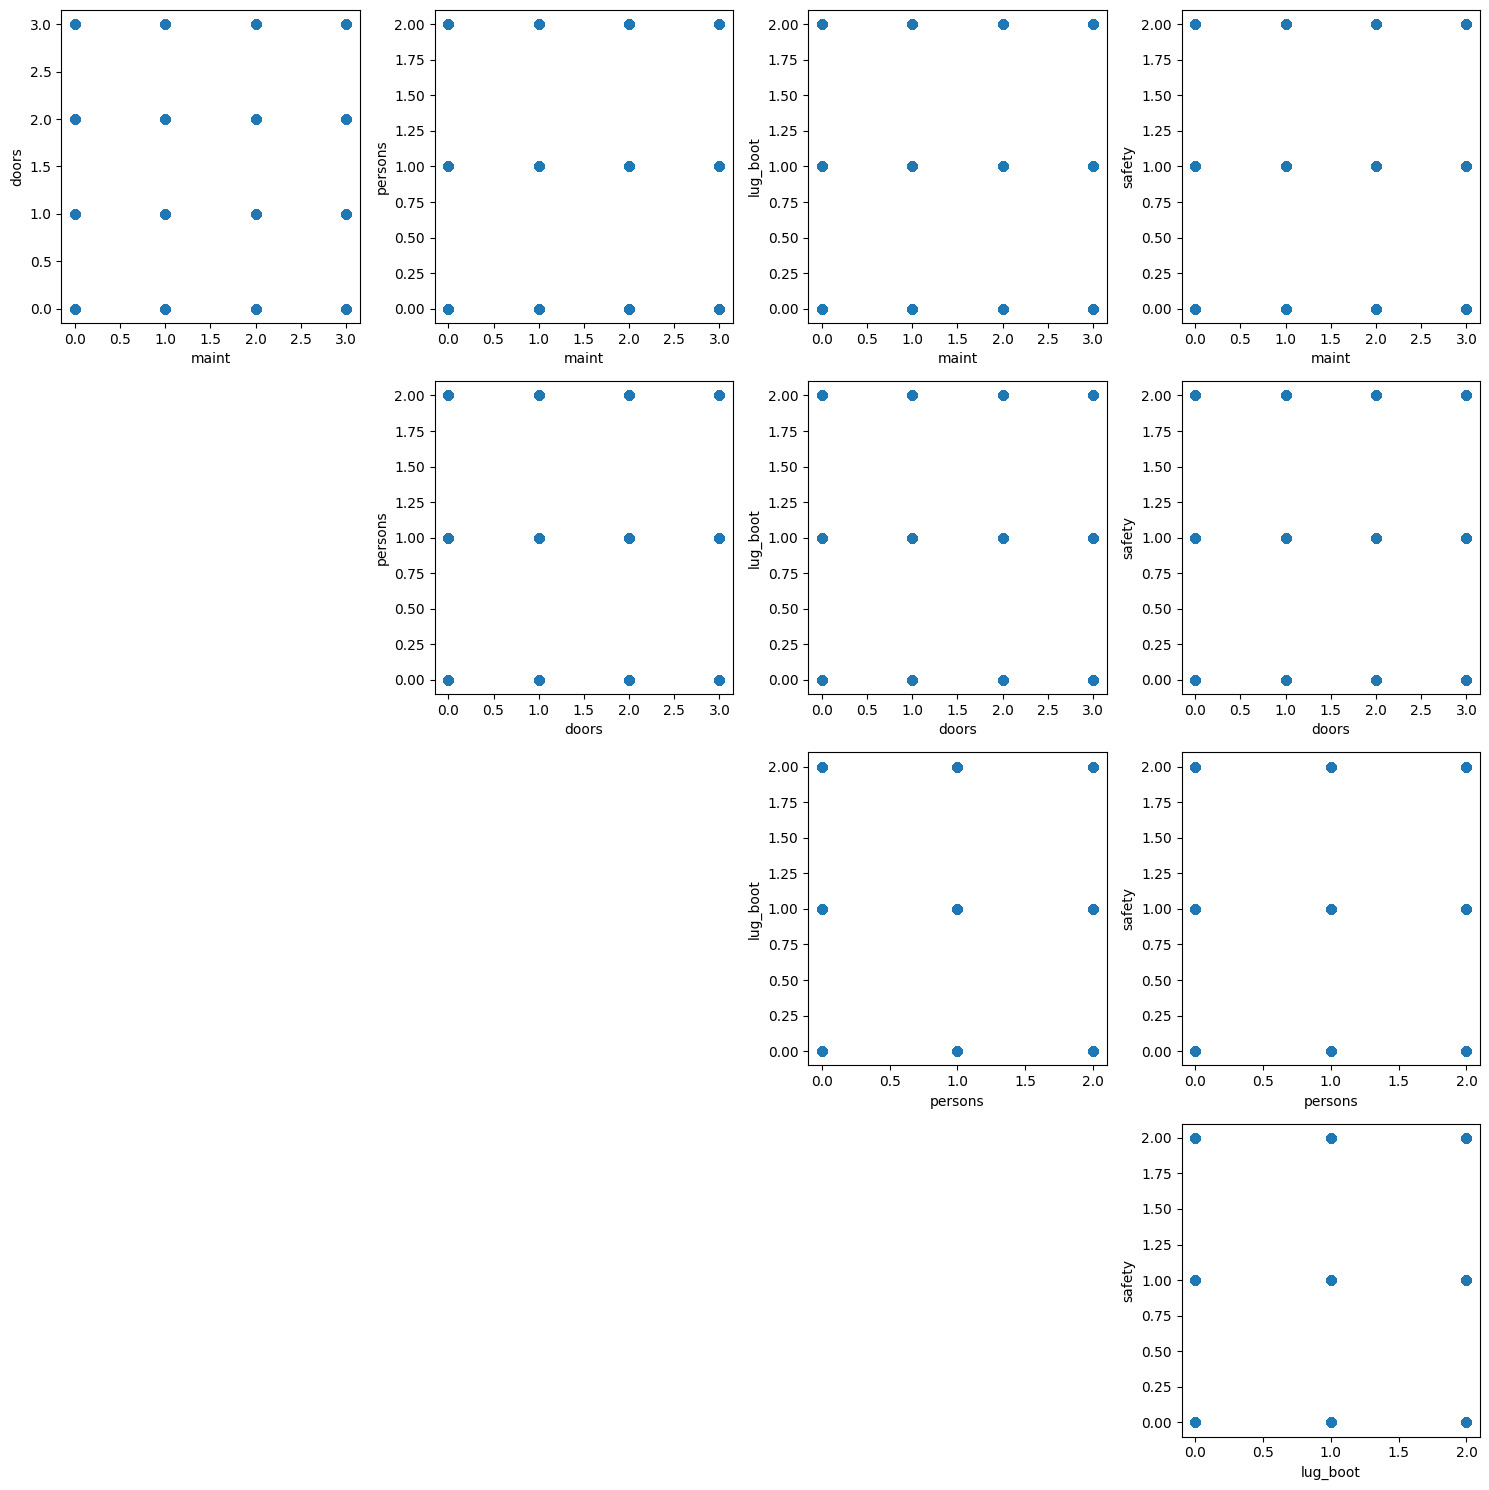

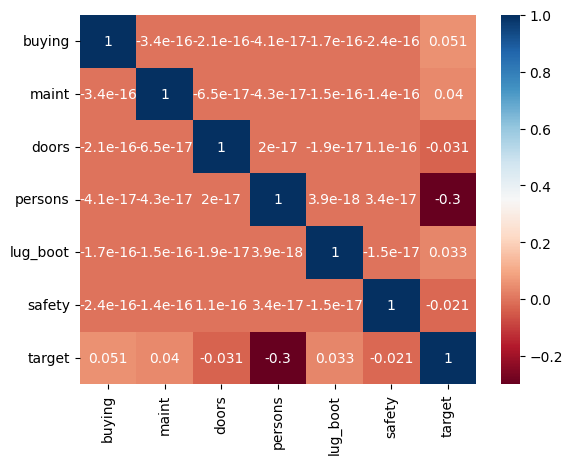

In [40]:

# Histograma
ds_final.hist(bins=10, figsize=(25,15))
plt.show()

# Density Plot
ds_final.plot(kind = 'density', subplots = True, layout = (7,3), sharex = False, figsize = (15,20))
plt.show()

# Boxplot
ds_final.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

# Gráficos de dispersão

colunas = ['maint', 'doors', 'persons', 'lug_boot','safety']
colors = ['red', 'blue', 'green', 'orange', 'purple']

plt.figure(figsize=(15, 15))

for i in range(len(colunas)):
    for j in range(i+1, len(colunas)):
        plt.subplot(len(colunas)-1, len(colunas)-1, (i*(len(colunas)-1)) + j)
        plt.scatter(ds_final[colunas[i]], ds_final[colunas[j]])
        plt.xlabel(colunas[i])
        plt.ylabel(colunas[j])

plt.tight_layout()
plt.show()



# Matriz de Correlação com Matplotlib Seaborn
sns.heatmap(ds_final.corr(), annot=True, cmap='RdBu');


Observando as visualizações chegamos às seguintes análises :
1. A coluna **target** tem valores concentrados no valor 2 o que pode dificultar o treinamento do modelo enquanto que as demais colunas tem uma distribuição homogência dos valores.

2. Não existem valores outliers no dataset, o que nos favorecerá para gerar modelos mais estáveis.

## Seleção de atributos


## Preparação dos dados

In [41]:
## Preparação dos dados

# Separação em bases de treino e teste (holdout)
array = ds_final.values
X = array[:,0:6] # atributos
y = array[:,6] # classe (target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7) # faz a divisão

# Criando os folds para a validação cruzada
num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7) # faz o particionamento em 10 folds

## Modelagem

###Identificação dos melhores Hiperparâmetros


####SVC

* Para o parâmetro de regularização C, utilizaremos a escala logarítmica [0.1, 1, 10], pois abrange uma variedade de ordens de magnitude e permite avaliar o desempenho do modelo em diferentes níveis de regularização.

In [42]:
# Definir os hiperparâmetros a serem testados
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'sigmoid', 'poly']
}

# Criar o objeto GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

# Realizar a busca em grade
grid_search.fit(X, y)

# Imprimir os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros encontrados: ", grid_search.best_params_)

# Imprimir a melhor pontuação alcançada
print("Melhor pontuação: ", grid_search.best_score_)

Melhores hiperparâmetros encontrados:  {'C': 10, 'kernel': 'rbf'}
Melhor pontuação:  0.8779291279215883


####KNeighborsClassifier


* Para n_neighbors procuramos utilizar valores que diminuíssem a possibilidade de overfitting e underfitting
* Para weights utilizamos os principais valores para considerar tanto pesos iguais quanto proporcionais

In [43]:
# Definir os hiperparâmetros a serem testados
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
}

# Criar o modelo KNeighborsClassifier
knn = KNeighborsClassifier()

# Executar a busca em grade com validação cruzada
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X, y)

# Imprimir os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros encontrados:")
print(grid_search.best_params_)

Melhores hiperparâmetros encontrados:
{'algorithm': 'brute', 'n_neighbors': 5, 'weights': 'distance'}


####DecisionTreeClassifier

* Para criterion utilizamos os 2 critérios mais comuns
* Para max_depth escolhemos valores que possam representar tanto árvores mais complexas quanto mais simples
* Os valores para min_samples_leaf e min_samples_split foram selecionados para cobrir um leque de diferentes cenários

In [44]:
# Definir os hiperparâmetros a serem testados
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Criar o modelo DecisionTreeClassifier
dt = DecisionTreeClassifier()

# Executar a busca em grade com validação cruzada
grid_search = GridSearchCV(dt, param_grid, cv=5)
grid_search.fit(X, y)

# Imprimir os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros encontrados:")
print(grid_search.best_params_)

Melhores hiperparâmetros encontrados:
{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


####GradientBoostingClassifier

* Para learning_rate, utilizamos valores menores com o intuito de evitar overfitting
* Os valores para n_estimators foram escolhidospara testar diferentes tamanhos do conjunto de estimadores, porém com equilíbrio entre o tempo de treino e a posibilidade de overfitting
* Para max_depth escolhemos valores que possam representar tanto árvores mais complexas quanto mais simples e avaliar o impacto da profundidade na capacidade de generalização do modelo
* Os valores para min_samples_split foram selecionados para cobrir um leque de diferentes cenários

In [45]:
# Definir os hiperparâmetros a serem testados
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

# Criar o modelo GradientBoostingClassifier
gb = GradientBoostingClassifier()

# Executar a busca em grade com validação cruzada
grid_search = GridSearchCV(gb, param_grid, cv=5)
grid_search.fit(X, y)

# Imprimir os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros encontrados:")
print(grid_search.best_params_)

Melhores hiperparâmetros encontrados:
{'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 100}


####GaussianNB

* Para var_smoothing_values utilizamos uma escala logarítmica para permitir testar uma ampla faixa de suavização


In [46]:
# Definir os hiperparâmetros a serem testados
var_smoothing_values = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1]

for var_smoothing in var_smoothing_values:
    # Criar o modelo GaussianNB com o valor atual de var_smoothing
    gnb = GaussianNB(var_smoothing=var_smoothing)

    # Treinar o modelo
    gnb.fit(X_train, y_train)

    # Fazer previsões nos dados de teste
    y_pred = gnb.predict(X_test)

    # Calcular a acurácia das previsões
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Acurácia (var_smoothing={var_smoothing}): {accuracy}")



Acurácia (var_smoothing=1e-09): 0.6098265895953757
Acurácia (var_smoothing=1e-07): 0.6676300578034682
Acurácia (var_smoothing=1e-05): 0.7283236994219653
Acurácia (var_smoothing=0.001): 0.7890173410404624
Acurácia (var_smoothing=0.1): 0.7745664739884393


### Treinamento e Avaliação

#### Validação cruzada

-------------------------------------------------------------------------
Validação cruzada
-------------------------------------------------------------------------
SVM: 0.906683 (0.024224)
KNN: 0.905969 (0.031544)
CART: 0.966761 (0.019341)
GBC: 0.980471 (0.010737)
NB: 0.622318 (0.024522)


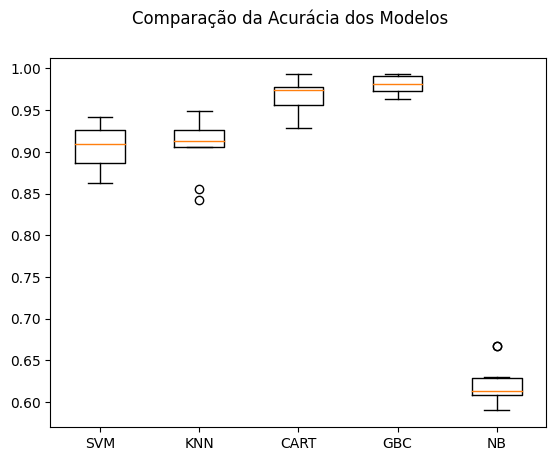

In [47]:
# Definindo uma seed global para esta célula de código
np.random.seed(7)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando o pipeline de modelos
models.append(('SVM', SVC()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('GBC', GradientBoostingClassifier()))
models.append(('NB', GaussianNB()))  # Como a distribuição é normal utilizaremos o Naive Bayes Gaussiano


print('-------------------------------------------------------------------------')
print('Validação cruzada')
print('-------------------------------------------------------------------------')

# Avaliando um modelo por vez
for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos resultados da validação cruzada
  print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação da Acurácia dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### Validação com Hiperparâmetros

-------------------------------------------------------------------------
Validação dos modelos utilizando os melhores hiperparâmetros encontrados
-------------------------------------------------------------------------
SVM: 0.710983
KNN: 0.904624
CART: 0.812139
GBC: 0.710983
NB: 0.774566


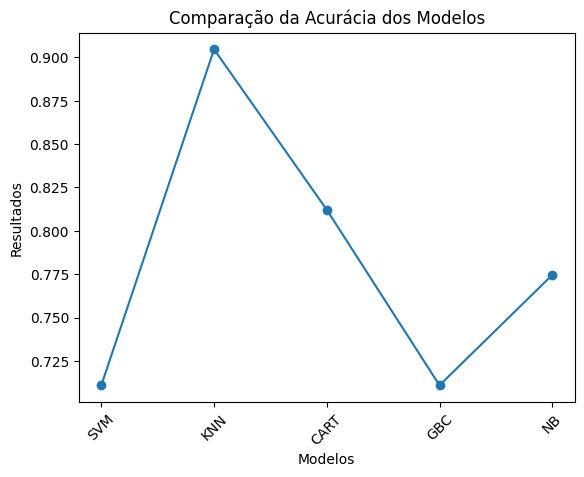

In [48]:
# preparando um array para armazenar os resultados
messages = []
results = []
names = []

messages.append('-------------------------------------------------------------------------')
messages.append('Validação dos modelos utilizando os melhores hiperparâmetros encontrados')
messages.append('-------------------------------------------------------------------------')

# Treinando os modelos com os melhores parâmetros encontrados

#------------------------------------------------------------------------------------------------------
# SVC

model_name = 'SVM'

svm = SVC(C=0.1, kernel='rbf')

# Treinar o modelo
svm.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_pred = svm.predict(X_test)

# Calcular a acurácia das previsões
accuracy = accuracy_score(y_test, y_pred)
msg = "%s: %f" % (model_name, accuracy)

names.append(model_name)
results.append(accuracy)
messages.append(msg)


#------------------------------------------------------------------------------------------------------
# KNeighborsClassifier

model_name = 'KNN'

# Criar o modelo KNeighborsClassifier com os hiperparâmetros especificados
knn = KNeighborsClassifier(n_neighbors=3, algorithm='brute', weights='uniform')

# Treinar o modelo
knn.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_pred = knn.predict(X_test)

# Calcular a acurácia das previsões
accuracy = accuracy_score(y_test, y_pred)
msg = "%s: %f" % (model_name, accuracy)

names.append(model_name)
results.append(accuracy)
messages.append(msg)


#------------------------------------------------------------------------------------------------------
# DecisionTreeClassifier

model_name = 'CART'

dt = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=1, min_samples_split=2)

# Treinar o modelo
dt.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_pred = dt.predict(X_test)

# Calcular a acurácia das previsões
accuracy = accuracy_score(y_test, y_pred)
msg = "%s: %f" % (model_name, accuracy)

names.append(model_name)
results.append(accuracy)
messages.append(msg)

#------------------------------------------------------------------------------------------------------
# GradientBoostingClassifier

model_name = 'GBC'

gb = GradientBoostingClassifier(learning_rate=0.001, max_depth=3, min_samples_split=2, n_estimators=100)

# Treinar o modelo
gb.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_pred = gb.predict(X_test)

# Calcular a acurácia das previsões
accuracy = accuracy_score(y_test, y_pred)
msg = "%s: %f" % (model_name, accuracy)

names.append(model_name)
results.append(accuracy)
messages.append(msg)

#------------------------------------------------------------------------------------------------------
# GaussianNB

model_name = 'NB'

# Criar o modelo GaussianNB
gnb = GaussianNB(var_smoothing=0.1)

# Treinar o modelo
gnb.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_pred = gnb.predict(X_test)

# Calcular a acurácia das previsões
accuracy = accuracy_score(y_test, y_pred)
#msg = "%s: %f (%f)" % ('GaussianNB', accuracy.mean(), accuracy.std()) # média e desvio padrão
msg = "%s: %f" % (model_name, accuracy)

names.append(model_name)
results.append(accuracy)
messages.append(msg)

#------------------------------------------------------------------------------------------------------
# Imprimindo os resultados
for message in messages:
    print(message)



# Gráfico de linhas para comparação dos resultados
# Configurar os dados do gráfico de linhas
plt.plot(names, results, marker='o')

# Configurar os rótulos do eixo x e y e o título do gráfico
plt.xlabel('Modelos')
plt.ylabel('Resultados')
plt.title('Comparação da Acurácia dos Modelos')

# Configurar os rótulos do eixo x em um ângulo de 45 graus
plt.xticks(rotation=45)


# Exibir o gráfico
plt.show()


#### *Observações*

Observamos que com excessão do modelo NB, todos obtiveram melhor acuracidade na validação cruzada em relação ao treino com hiperparâmetros definidos. PQ???? parâmetros ruins???

#### Conclusão

Comparando os resultados obtidos pela validação cruzada dos modelos e pelo treinamento com os hiperparâmetros definidos, chegamos à conclusão que o modelo de maior acuracidade atingindo 98,0471 % é o GradientBoostingClassifier utilizando os valores padrões, que adotaremos na fase de testes.


### Teste

In [49]:
# Criando um modelo com todo o conjunto de treino utilizando o GradientBoostingClassifier por ter alcançado
# a maior acurácia (98,0471%)

model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test)

# Estimando a acurácia no conjunto de teste
print(accuracy_score(y_test, predictions))

0.9855491329479769


### Conclusão final
Observamos que o modelo GradientBoostingClassifier se comportou de forma semelhante tanto no treinamento quanto no teste, aumentando ainda mais a acuracidade no teste, o que é um indicativo positivo de que o modelo está aprendendo padrões relevantes e fazendo previsões mais precisas em dados não vistos anteriormente além não estar sofrendo de overfitting.
